# Case Study 2 - Predicting Hospital Readmittance

__Team Members:__ Amber Clark, Andrew Leppla, Jorge Olmos, Paritosh Rai

# Content
* [Business Understanding](#business-understanding)
    - [Scope](#scope)
    - [Introduction](#introduction)
    - [Methods](#methods)
    - [Results](#results)
* [Data Evaluation](#data-evaluation)
    - [Loading Data](#loading-data) 
    - [Data Summary](#data-summary)
    - [Missing Values](#missing-values)
    - [Feature Removal](#feature-removal)
    - [Exploratory Data Analysis (EDA)](#eda)
    - [Assumptions](#assumptions)
* [Model Preparations](#model-preparations)
    - [Sampling & Scaling Data](#sampling-scaling-data)
    - [Proposed Method](#proposed-metrics)
    - [Evaluation Metrics](#evaluation-metrics)
    - [Feature Selection](#feature-selection)
* [Model Building & Evaluations](#model-building)
    - [Sampling Methodology](#sampling-methodology)
    - [Model](#model)
    - [Performance Analysis](#performance-analysis)
* [Model Interpretability & Explainability](#model-explanation)
    - [Examining Feature Importance](#examining-feature-importance)
* [Conclusion](#conclusion)
    - [Final Model Proposal](#final-model-proposal)
    - [Future Considerations and Model Enhancements](#model-enhancements)
    - [Alternative Modeling Approaches](#alternative-modeling-approaches)

# Business Understanding & Executive Summary <a id='business-understanding'/>

### Scope <a id='scope'/>


### Introduction <a id='introduction'/>


### Methods <a id='methods'/>
 
 
### Results <a id='results'/>
 

# Data Evaluation <a id='data-evaluation'>
    

In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedGroupKFold

# prediction models
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from kneed import KneeLocator
from scipy import stats

# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve as pr_curve
from sklearn.metrics import plot_precision_recall_curve as plot_pr_curve
from sklearn.metrics import auc

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

## Loading Data <a id='loading-data'>

In [2]:
os.getcwd()

'C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022\\ds7333_case_study_2'

In [3]:
#os.chdir('C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022')

In [4]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv', na_values='?') 

C:\Users\allep\anaconda3\envs\MyEnv3_7\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
adm_type = pd.read_csv('dataset_diabetes/IDs_mapping.csv') 

## Data Summary <a id='data-summary'>

## Missing Values <a id='missing-values'>

Missing values are represented as "?" in the dataset.  These were converted to NaN when loading the data.

In [6]:
nulls = df.isnull().describe()
nulls

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,1,1,2,1,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,101766,101766,99493,101766,101766,98569,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766


In [7]:
cols = nulls.columns
missing_col = [c for c in cols if nulls[c]['unique'] == 2]
print("\nColumns Missing Data", missing_col)


Columns Missing Data ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


## Feature Removal <a id='feature-removal'>

Columns 'encounter_id' and 'patient_nbr' are data table keys (unique identifiers) that should be removed for modeling.

In [8]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [9]:
# encounter_id and patient_nbr are data table keys (unique identifiers) that should be removed for modeling
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)

## Exploratory Data Analysis (EDA) <a id='eda'>

### Response 'readmitted'
We want to predict if 'readmitted' is <30 or not.  Recode to combine >30 and NO.

In [10]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [11]:
# Recode 'readmitted' to binary: <30 or not <30
df['readmit_binary'] = df['readmitted']=='<30'
df['readmit_binary'].value_counts()

False    90409
True     11357
Name: readmit_binary, dtype: int64

In [12]:
df['readmit_binary'].value_counts(normalize=True)

False    0.888401
True     0.111599
Name: readmit_binary, dtype: float64

In [13]:
cont_summary = df.describe()
cont_summary

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


#### Group variables by continuous and categorical types

In [14]:
# Column names of features coded as continuous
cont_summary.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [15]:
# Recode id variables to categorical
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)

In [16]:
# Continuous variables in the dataset
cont_vars = list( df.describe().columns )
cont_vars

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

#### Continuous Feature EDA
A few "continuous" features are discrete and highly zero-inflated.  There is a positive correlation between num_medications and num_procedures

In [17]:
# Continuous predictor distributions and correlations
#sns.pairplot(df[cont_vars], diag_kind='kde', corner=True)

In [18]:
plot_vars = list(cont_vars)
plot_vars.append('readmit_binary')

#### Response vs. Numeric Features
Not much visual separation or shifts in the response classes vs. the numeric variables.  These are likely poor class predictors.

In [19]:
#sns.pairplot(df[plot_vars], hue='readmit_binary', corner=True)

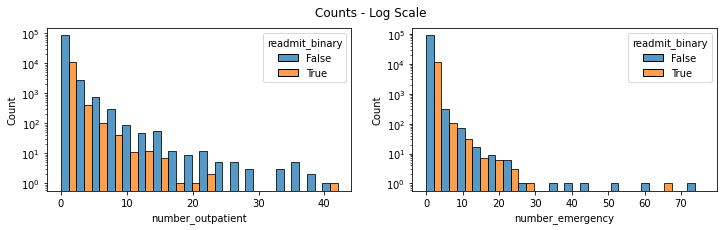

In [20]:
# Use y log scale on zero-inflated features to see counts better 

zero_inflated = ['number_outpatient', 'number_emergency']
num = len(zero_inflated)

fig, axes = plt.subplots(1, num, figsize=(12, 3))
fig.suptitle('Counts - Log Scale')
for i,j in zip(zero_inflated, range(num)):
    sns.histplot(ax = axes[j], x = df[i], hue=df['readmit_binary'], multiple="dodge", log_scale=[False, True]); 

In [21]:
# Categorical variables in the dataset
cat_vars = list( df.columns.drop(cont_vars) )

# Remove response variables
cat_vars.remove('readmitted')
cat_vars.remove('readmit_binary')
np.array(cat_vars)

array(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'payer_code',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
       'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide',
       'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed'], dtype='<U24')

In [22]:
df[cat_vars].head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,NaN,Pediatrics-Endocrinology,250.83,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,NaN,NaN,276,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,NaN,NaN,648,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,NaN,NaN,8,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,NaN,NaN,197,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [23]:
# Explore categorical variables
cat_desc = df[cat_vars].describe()
cat_desc

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,payer_code,medical_specialty,diag_1,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,99493,101766,101766,3197,101766,101766,101766,61510,51817,101745,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,8,26,17,17,72,716,...,1,1,4,4,2,2,2,2,2,2
top,Caucasian,Female,[70-80),[75-100),1,1,7,MC,InternalMedicine,428,...,No,No,No,No,No,No,No,No,No,Yes
freq,76099,54708,26068,1336,53990,60234,57494,32439,14635,6862,...,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363


In [24]:
# Drop columns with only one unique value (no information for modeling)

cols = cat_desc.columns
col_drops = [c for c in cols if cat_desc[c]['unique'] == 1]
print("Material Drops", col_drops)
[cat_vars.remove(c) for c in col_drops]

print("# Categorical Variables =", len(cat_vars))

Material Drops ['examide', 'citoglipton']
# Categorical Variables = 37


In [25]:
# Drop columns with missing data
cat_vars_nonull = list(cat_vars)
[cat_vars_nonull.remove(c) for c in missing_col]
print("# Non-Missing Categorical Variables =", len(cat_vars_nonull))

# Non-Missing Categorical Variables = 30


### Feature Collinearity <a id='feature-collinearity'>


### Feature Outliers 
 

## Assumptions <a id='assumptions'>

# Model Preparations <a id='model-preparations'/>

## Sampling & Scaling Data <a id='sampling-scaling-data' />

Use Stratified sampling to ensure equal splitting between imbalanced response classes

In [26]:
# Define y and X
y = np.array(df['readmit_binary'].astype(int)) # needs to be int for Logistic Regression

X_cont = df[cont_vars]
print('# Continuous Variables =', len(cont_vars))

# Continuous Variables = 8


In [67]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343)

for train_index, test_index in sss.split(df, y):
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Center and Scale X[cont_vars]
scl = StandardScaler()
scl.fit(X_train[cont_vars])
X_train_scaled = scl.transform(X_train[cont_vars]) # apply to training
X_test_scaled = scl.transform(X_test[cont_vars]) # apply to the test set (without snooping)

# Keep the feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_cont.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_cont.columns, index = X_test.index)

#### Check that the training & test set classes for y are balanced - They are good.

In [28]:
pd.DataFrame(y_train).value_counts(normalize=True)

0    0.888399
1    0.111601
dtype: float64

In [29]:
pd.DataFrame(y_test).value_counts(normalize=True)

0    0.888405
1    0.111595
dtype: float64

## Proposed Method <a id='proposed-metrics' />

## Evaluation Metrics <a id='evaluation-metrics' />

### Baseline Model

#### Use all continuous variables to predict readmittance <30 days. 

In [68]:
lgr = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')

lgr.fit(X_train_scaled, y_train)
y_hat_train = lgr.predict(X_train_scaled)
y_hat_test = lgr.predict(X_test_scaled)

#### Training Set

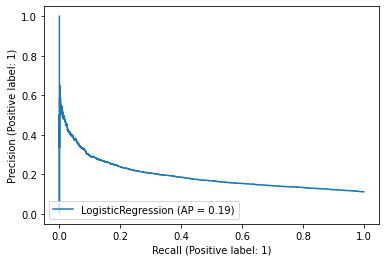

In [31]:
plot_pr_curve(lgr, X_train_scaled, y_train)

# AP = Average Precision

In [32]:
# Get precision, recall, and thresholds from the precision_recall_curve (pr_curve)
y_train_proba = lgr.predict_proba(X_train_scaled)
precision, recall, thresholds = pr_curve(y_train, y_train_proba[:,1])

print("Training Set:\n")
print("PR AUC=", round(auc(recall,precision), 3))

# Get the threshold from training that maximizes f1 score

# remove (0,0) point on graph for f1 - divide by zero
precision = precision[precision!=0]
recall = recall[np.where(precision!=0)]
f1 = 2*precision*recall/(precision+recall)
train_threshold = thresholds[ np.where(f1 == np.max(f1)) ][0]

print("Max F1 Score =", round(np.max(f1),3), "with Threshold =", round(train_threshold,3))
print("Precision =", round( precision[ np.where(f1 == np.max(f1)) ][0], 3) )
print( "Recall =", round( recall[ np.where(f1 == np.max(f1)) ][0], 3) )

Training Set:

PR AUC= 0.194
Max F1 Score = 0.254 with Threshold = 0.524
Precision = 0.186
Recall = 0.399


#### Test Set - Consistent with Training Set

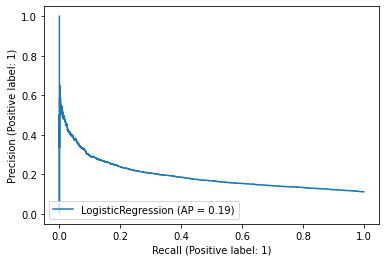

In [33]:
plot_pr_curve(lgr, X_train_scaled, y_train)

In [34]:
# Get precision, recall, and thresholds from the precision_recall_curve (pr_curve)
y_test_proba = lgr.predict_proba(X_test_scaled)
precision, recall, thresholds = pr_curve(y_test, y_test_proba[:,1])

print("Test Set:\n")
print("PR AUC=", round(auc(recall, precision), 3))

# Apply the training threshold to the test set predictions
y_hat_test = ( y_test_proba[:,1] > train_threshold ).astype(int)

report = classification_report(y_test, y_hat_test)
print("\n", report[0:43])
print(report[109:152])
print(report[163:210])

Test Set:

PR AUC= 0.188

               precision    recall  f1-score
           1       0.18      0.39      0.25

    accuracy                           0.74   


In [35]:
confusion_matrix(y_test, y_hat_test)

array([[21208,  5915],
       [ 2093,  1314]], dtype=int64)

In [69]:
feat_coef = []
feat = zip(X_train_scaled.columns, lgr.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat = feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')
top_feat

,feature,coef
2,num_procedures,-0.053890
4,number_outpatient,-0.007412
1,num_lab_procedures,0.004612
3,num_medications,0.035266
5,number_emergency,0.043767
0,time_in_hospital,0.090410
7,number_diagnoses,0.119415
6,number_inpatient,0.376791


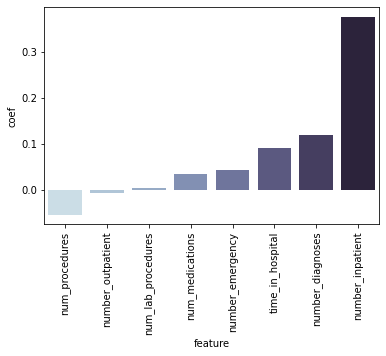

In [75]:
feat_plot = sns.barplot(data=top_feat, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.show()

## Use imputed categorical data to predict readmitted

In [38]:
os.chdir('C:\\Users\\allep\\QTW_Projects\\QTW-SPRING-2022\\ds7333_case_study_2')

In [39]:
df_imp = pd.read_csv('diabetic_data_imputed.csv')

In [40]:
df_imp['readmit_binary'] = df_imp['readmitted']=='<30'

In [41]:
y = df_imp['readmit_binary'].astype(int)
df_imp = df_imp.drop(['Unnamed: 0','readmitted','readmit_binary'], axis=1)

### Use Stratified 70/30 training/test split to ensure class balance

In [42]:
# Split the data for X
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343)

for train_index, test_index in sss.split(df_imp, y):
    X_train, X_test = df_imp.iloc[train_index,:], df_imp.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
      
# Center and Scale X
scl = StandardScaler()
scl.fit(X_train[cont_vars])
X_train_scaled = pd.DataFrame( scl.transform(X_train[cont_vars]), columns = cont_vars, index = X_train.index) # apply to training
X_test_scaled = pd.DataFrame( scl.transform(X_test[cont_vars]), columns = cont_vars, index = X_test.index ) # apply to the test set (without snooping)

X_train_cat = X_train.drop(X_train._get_numeric_data().columns, 1)
X_test_cat = X_test.drop(X_train._get_numeric_data().columns, 1)

C:\Users\allep\anaconda3\envs\MyEnv3_7\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Users\allep\anaconda3\envs\MyEnv3_7\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


In [43]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train_cat)

X_train_cat_e = pd.DataFrame( enc.transform(X_train_cat).toarray(), columns = enc.get_feature_names(), index = X_train.index)
X_test_cat_e = pd.DataFrame(enc.transform(X_test_cat).toarray(), columns = enc.get_feature_names(), index = X_test.index)

In [44]:
X_train_scaled = pd.concat([X_train_scaled, X_train_cat_e], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test_cat_e], axis=1)

In [45]:
lgr = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', class_weight='balanced')

lgr.fit(X_train_scaled, y_train)
y_hat_train = lgr.predict(X_train_scaled)
y_hat_test = lgr.predict(X_test_scaled)

#### Training Set

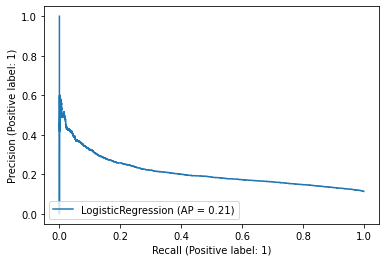

In [46]:
plot_pr_curve(lgr, X_train_scaled, y_train)

In [47]:
# Get precision, recall, and thresholds from the precision_recall_curve (pr_curve)
y_train_proba = lgr.predict_proba(X_train_scaled)
precision, recall, thresholds = pr_curve(y_train, y_train_proba[:,1])

print("Training Set:\n")
print("PR AUC=", round(auc(recall,precision), 3))

# Get the threshold from training that maximizes f1 score

# remove (0,0) point on graph for f1 - divide by zero
precision = precision[precision!=0]
recall = recall[np.where(precision!=0)]
f1 = 2*precision*recall/(precision+recall)
train_threshold = thresholds[ np.where(f1 == np.max(f1)) ][0]

print("Max F1 Score =", round(np.max(f1),3), "with Threshold =", round(train_threshold,3))
print( "Recall =", round( recall[ np.where(f1 == np.max(f1)) ][0], 3) )
print("Precision =", round( precision[ np.where(f1 == np.max(f1)) ][0], 3) )

Training Set:

PR AUC= 0.21
Max F1 Score = 0.273 with Threshold = 0.534
Recall = 0.484
Precision = 0.19


#### Test Set - Consistent with Training Set

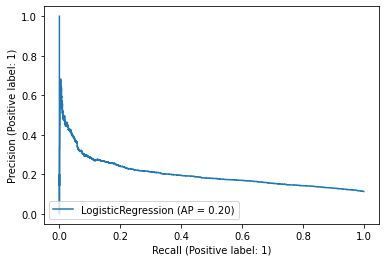

In [48]:
plot_pr_curve(lgr, X_test_scaled, y_test)

In [49]:
# Get precision, recall, and thresholds from the precision_recall_curve (pr_curve)
y_test_proba = lgr.predict_proba(X_test_scaled)
precision, recall, thresholds = pr_curve(y_test, y_test_proba[:,1])

print("Test Set:\n")
print("PR AUC=", round(auc(recall,precision), 3))

# Apply the training threshold to the test set predictions
y_hat_test = ( y_test_proba[:,1] > train_threshold ).astype(int)

report = classification_report(y_test, y_hat_test)
print("\n", report[0:43])
print(report[109:152])
print(report[163:210])

Test Set:

PR AUC= 0.201

               precision    recall  f1-score
           1       0.18      0.47      0.26

    accuracy                           0.71   


In [50]:
confusion_matrix(y_test, y_hat_test)

array([[19945,  7178],
       [ 1806,  1601]], dtype=int64)

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

## Feature Selection <a id='feature-selection' />

In [51]:
feat_coef = []
feat = zip(X_train_scaled.columns, lgr.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
feat_coef.loc[abs(feat_coef['coef'])>0.9].sort_values(by='coef')

,feature,coef
198,x30_expired,-4.070957
80,x4_Pediatrics-Endocrinology,-1.711757
56,x4_Gynecology,-1.365775
73,x4_Otolaryngology,-1.266015
169,x19_Steady,-1.064057
16,x2_[0-10),-1.051031
154,x15_Steady,-0.950482
43,x4_AllergyandImmunology,0.972581
57,x4_Hematology,1.262936
195,x30_admitted,1.654802


### 'expired' and 'admitted' are not value-added dummy variables.  You don't need a model to tell you that a patient that died (expired) won't be readmitted, or that a patient must be admitted prior to being readmitted.  

In [52]:
X_train_scaled = X_train_scaled.drop(['x30_expired','x30_admitted'], axis=1)
X_test_scaled = X_test_scaled.drop(['x30_expired','x30_admitted'], axis=1)

In [53]:
lgr = LogisticRegression(penalty='l2', C=0.5, solver='liblinear', class_weight='balanced')

lgr.fit(X_train_scaled, y_train)
y_hat_train = lgr.predict(X_train_scaled)
y_hat_test = lgr.predict(X_test_scaled)

### No change in model performance after removing 'expired' and 'admitted'

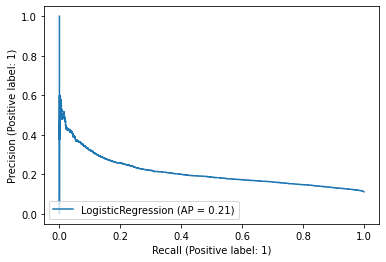

In [54]:
plot_pr_curve(lgr, X_train_scaled, y_train)

In [55]:
# Get precision, recall, and thresholds from the precision_recall_curve (pr_curve)
y_train_proba = lgr.predict_proba(X_train_scaled)
precision, recall, thresholds = pr_curve(y_train, y_train_proba[:,1])

print("Training Set:\n")
print("PR AUC=", round(auc(recall,precision), 3))

# Get the threshold from training that maximizes f1 score

# remove (0,0) point on graph for f1 - divide by zero
precision = precision[precision!=0]
recall = recall[np.where(precision!=0)]
f1 = 2*precision*recall/(precision+recall)
train_threshold = thresholds[ np.where(f1 == np.max(f1)) ][0]

print("Max F1 Score =", round(np.max(f1),3), "with Threshold =", round(train_threshold,3))
print( "Recall =", round( recall[ np.where(f1 == np.max(f1)) ][0], 3) )
print("Precision =", round( precision[ np.where(f1 == np.max(f1)) ][0], 3) )

Training Set:

PR AUC= 0.209
Max F1 Score = 0.272 with Threshold = 0.534
Recall = 0.483
Precision = 0.19


In [56]:
# Get precision, recall, and thresholds from the precision_recall_curve (pr_curve)
y_test_proba = lgr.predict_proba(X_test_scaled)
precision, recall, thresholds = pr_curve(y_test, y_test_proba[:,1])

print("Test Set:\n")
print("PR AUC=", round(auc(recall,precision), 3))

# Apply the training threshold to the test set predictions
y_hat_test = ( y_test_proba[:,1] > train_threshold ).astype(int)

report = classification_report(y_test, y_hat_test)
print("\n", report[0:43])
print(report[109:152])
print(report[163:210])

Test Set:

PR AUC= 0.201

               precision    recall  f1-score
           1       0.18      0.47      0.26

    accuracy                           0.71   


In [57]:
feat_coef = []
feat = zip(X_train_scaled.columns, lgr.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat = feat_coef.loc[abs(feat_coef['coef'])>0.9].sort_values(by='coef')
top_feat

,feature,coef
80,x4_Pediatrics-Endocrinology,-1.715993
56,x4_Gynecology,-1.365216
73,x4_Otolaryngology,-1.264599
169,x19_Steady,-1.095576
16,x2_[0-10),-1.061838
154,x15_Steady,-0.990975
43,x4_AllergyandImmunology,0.974596
57,x4_Hematology,1.253349
197,x30_hospice,1.512180
196,x30_discharged,2.423314


#### columns x33-34_K = diagnoses (diag 1-3) for complications in child birth

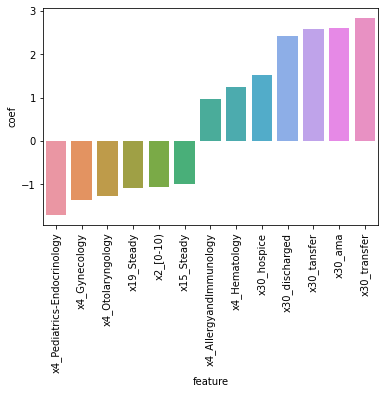

In [66]:
feat_plot = sns.barplot(data=top_feat, x='feature', y='coef')
plt.xticks(rotation=90)
plt.show()

# Model Building & Evaluations <a id='model-building'/>

## Sampling Methodology <a id='sampling-methodology'/>

#### Per the code above we used a 70/30 train test sample split with 3 or 5 fold internal cross validation for training

## Model's Performance Analysis <a id='performance-analysis'/>

# Model Interpretability & Explainability <a id='model-explanation'>

## Examining Feature Importance <a id='examining-feature-importance'/>

# Conclusion <a id='conclusion'>

### Final Model Proposal <a id='final-model-proposal'/>

### Future Considerations and Model Enhancements <a id='model-enhancements'/>

### Alternative Modeling Approaches <a id='alternative-modeling-approaches'>